# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | shizunai-furukawacho
Processing Record 3 of Set 1 | koryazhma
Processing Record 4 of Set 1 | hotan
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | trairi
Processing Record 13 of Set 1 | chapada dos guimaraes
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 18 of Set 1 | dakhla
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | tiksi
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,22.53,96,98,2.35,EC,1715414179
1,shizunai-furukawacho,42.3339,142.3669,13.08,71,72,4.42,JP,1715414179
2,koryazhma,61.3143,47.1691,-0.05,79,100,0.40,RU,1715414180
3,hotan,37.0997,79.9269,29.55,6,100,3.40,CN,1715414180
4,wailua homesteads,22.0669,-159.3780,19.30,88,28,0.89,US,1715414181


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,22.53,96,98,2.35,EC,1715414179
1,shizunai-furukawacho,42.3339,142.3669,13.08,71,72,4.42,JP,1715414179
2,koryazhma,61.3143,47.1691,-0.05,79,100,0.40,RU,1715414180
3,hotan,37.0997,79.9269,29.55,6,100,3.40,CN,1715414180
4,wailua homesteads,22.0669,-159.3780,19.30,88,28,0.89,US,1715414181


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

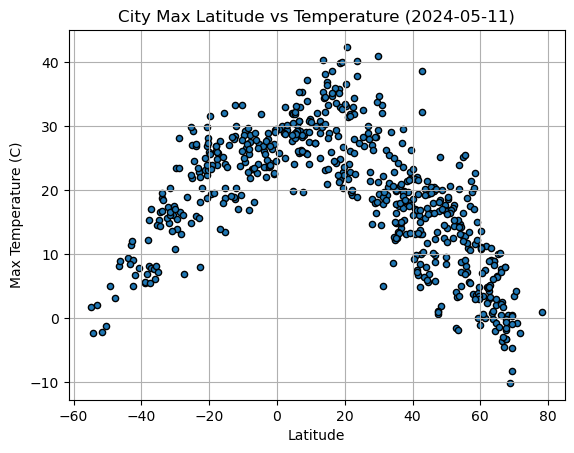

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot(kind='scatter',
                  x='Lat',
                  y='Max Temp',
                  xlabel='Latitude',
                  ylabel='Max Temperature (C)',
                  title='City Max Latitude vs Temperature (2024-05-11)',
                  grid=True,
                  edgecolors='black')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

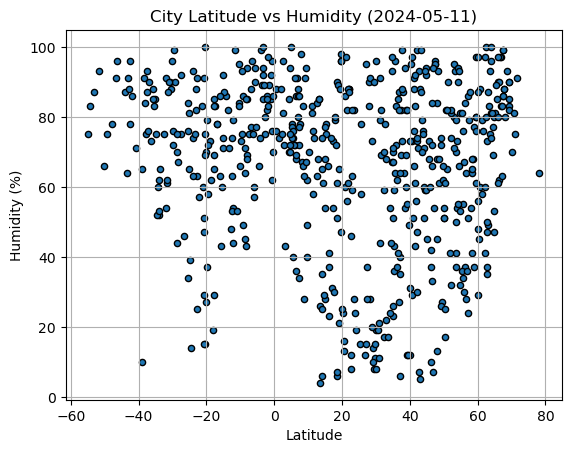

In [9]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot(kind='scatter',
                  x='Lat',
                  y='Humidity',
                  xlabel='Latitude',
                  ylabel='Humidity (%)',
                  title='City Latitude vs Humidity (2024-05-11)',
                  grid=True,
                  edgecolors='black')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

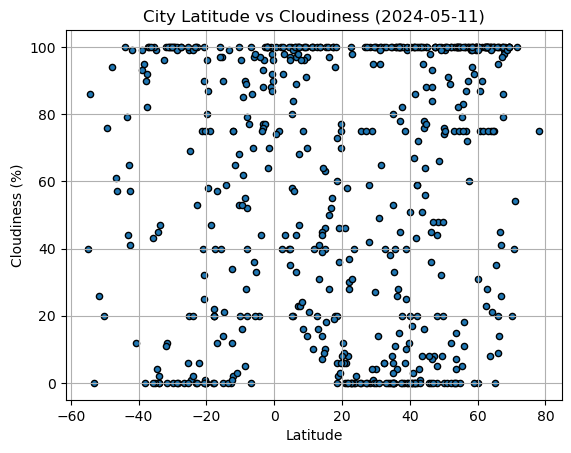

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot(kind='scatter',
                  x='Lat',
                  y='Cloudiness',
                  xlabel='Latitude',
                  ylabel='Cloudiness (%)',
                  title='City Latitude vs Cloudiness (2024-05-11)',
                  grid=True,
                  edgecolors='black')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

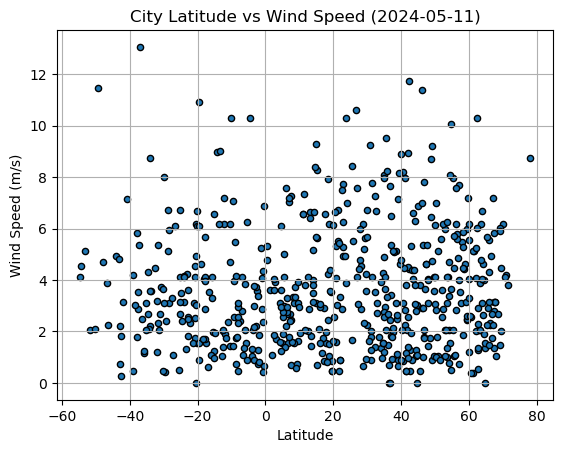

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot(kind='scatter',
                  x='Lat',
                  y='Wind Speed',
                  xlabel='Latitude',
                  ylabel='Wind Speed (m/s)',
                  title='City Latitude vs Wind Speed (2024-05-11)',
                  grid=True,
                  edgecolors='black')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,shizunai-furukawacho,42.3339,142.3669,13.08,71,72,4.42,JP,1715414179
2,koryazhma,61.3143,47.1691,-0.05,79,100,0.40,RU,1715414180
3,hotan,37.0997,79.9269,29.55,6,100,3.40,CN,1715414180
4,wailua homesteads,22.0669,-159.3780,19.30,88,28,0.89,US,1715414181
6,fortuna,40.5982,-124.1573,13.14,97,0,3.09,US,1715414182


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,22.53,96,98,2.35,EC,1715414179
5,margaret river,-33.9500,115.0667,18.83,52,0,2.23,AU,1715414181
9,bredasdorp,-34.5322,20.0403,16.61,52,4,4.32,ZA,1715414183
10,trairi,-3.2778,-39.2689,23.70,94,77,3.00,BR,1715414184
11,chapada dos guimaraes,-15.4606,-55.7497,18.81,60,97,1.97,BR,1715414184


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8310923372257084


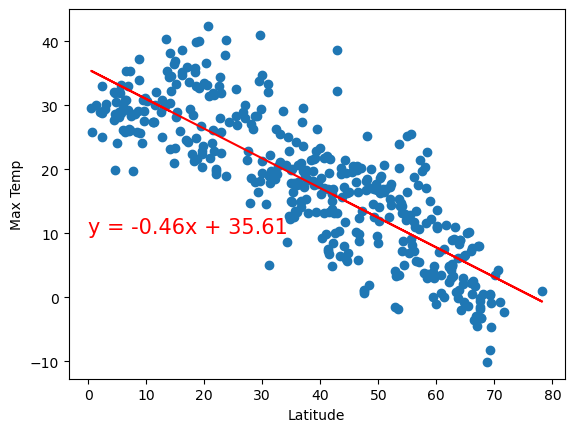

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (0,10), color='r', fontsize=15)
plt.show()

The r-value is: 0.7984919319978007


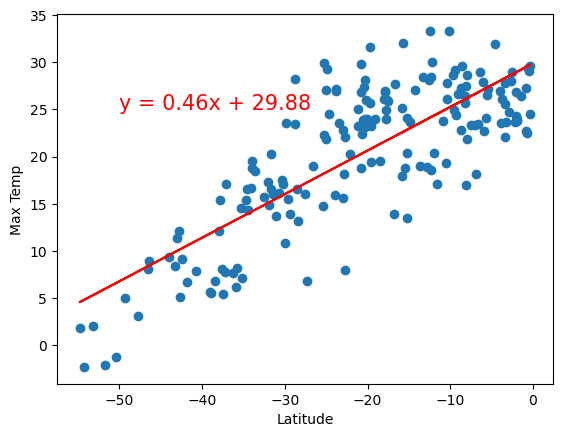

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-50,25), color='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:**

The cities on the northern hemisphere shows a strong negative relationship of -0.8. The further north it goes, the maximum temperature shows a tendency to decrease.

On the other hand, the cities on the southern hemispehre shows a strong positive relationship of 0.8. The closer to the equator it goes, the maximum temperature shows a tendency to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10829562919183641


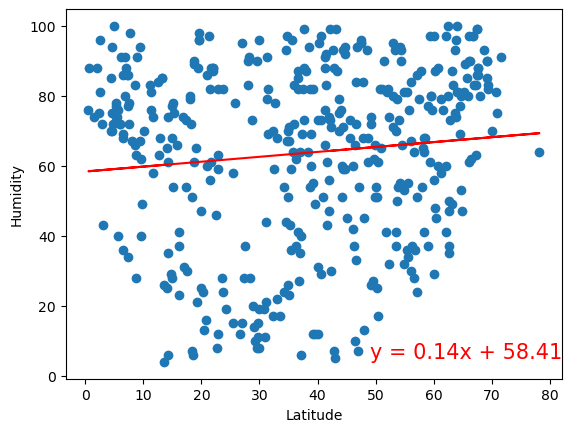

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (49,5), color='r', fontsize=15)
plt.show()

The r-value is: 0.02314536218271293


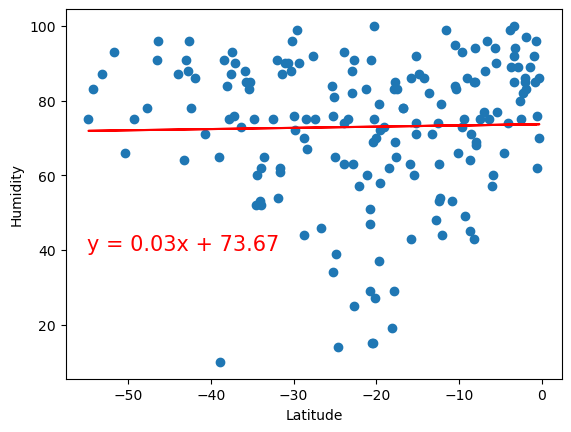

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-55,40), color='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:**

The cities on the northern hemisphere shows a weak positive correlation of 0.1. The cities latitude does not appear to affect the humidity as much. 

Similarly, the cities on the southern hemispehre shows almost no correlation with a value of 0. The cities latitude does not appear to affect the humidity as much as well. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16212863918777495


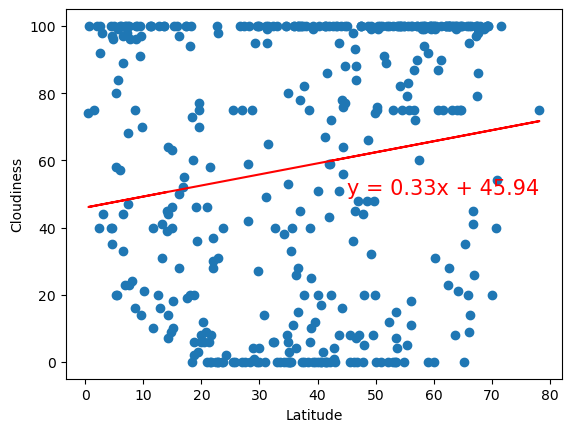

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (45,50), color='r', fontsize=15)
plt.show()

The r-value is: 0.08686097965804487


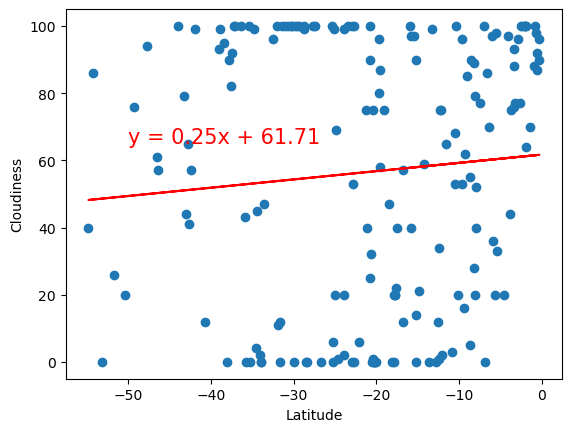

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-50,65), color='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:**

The cities on the northern hemisphere shows a weak positive correlation of 0.2 between its latitude and cloudiness.

On the other hand, the cities on the southern hemispehre shows a weak positive correlation of 0.1. The cities latitude does not appear to affect the cloudiness as much. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.021150277184914308


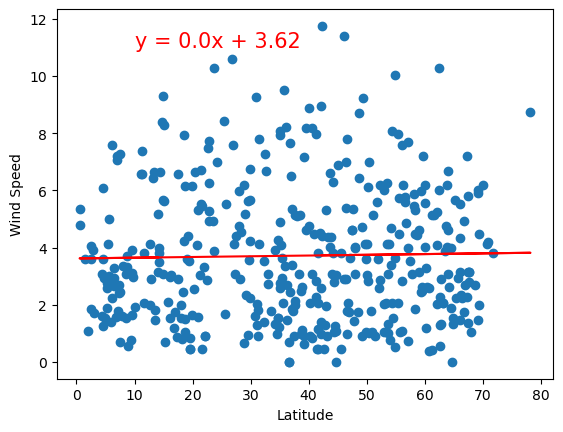

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (10,11), color='r', fontsize=15)
plt.show()

The r-value is: -0.11694053262860173


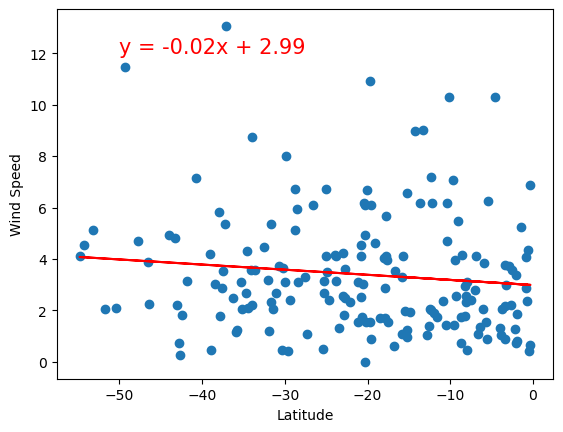

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-50,12), color='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:**

The cities on the northern hemisphere shows almost no correlation with a value of 0 between its latitude and wind speed.

Similarly, the cities on the southern hemispehre shows a weak negative correlation with a value of -0.1. The cities latitude does not appear to affect the wind speed as much as well. 